# 半徑鄰近演算法分類(Radius Neighbor Classification)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

# Training Data

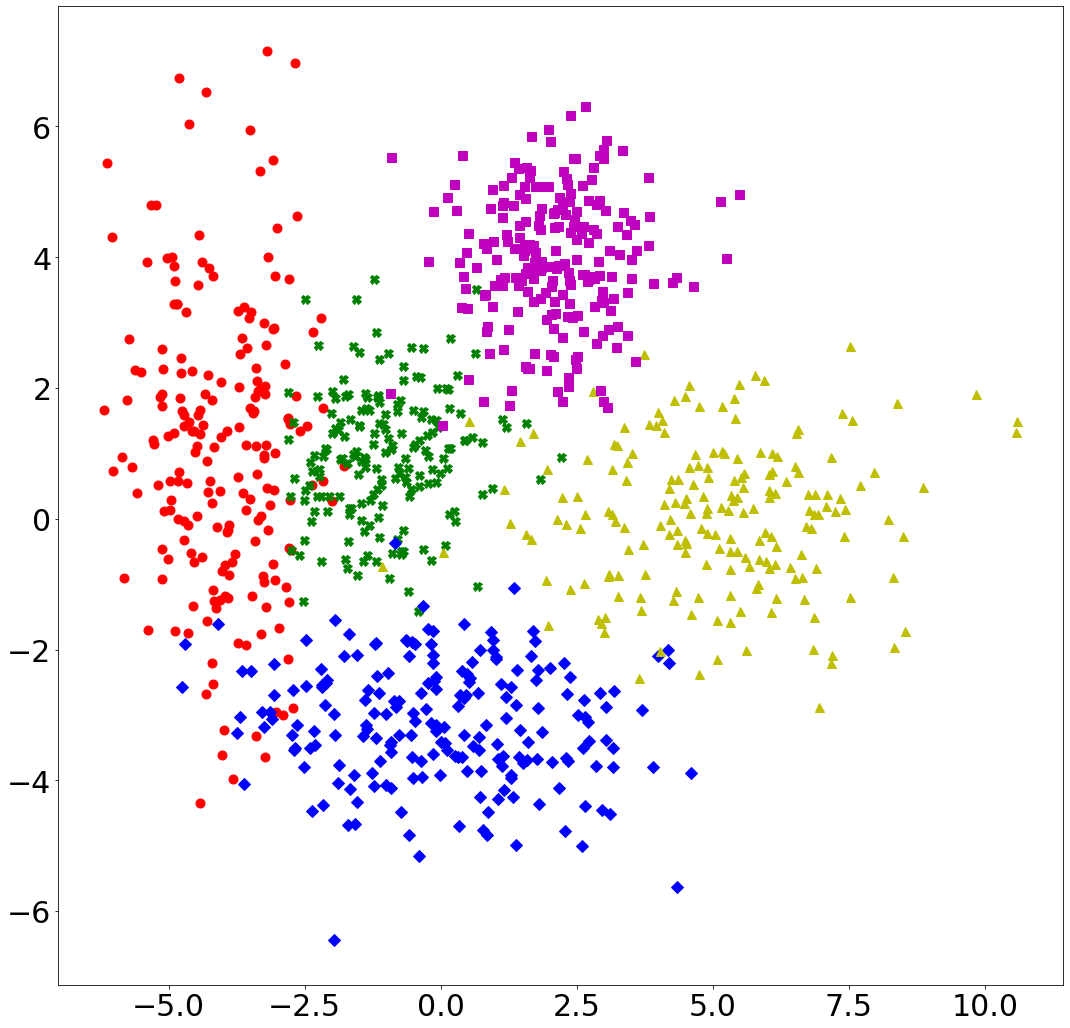

In [2]:
N=1000
CLASS=5
x=np.zeros((N,2))
y=random.randint(0,CLASS,N)
x_loc=[-4,-1,0,5,2]
x_scale=[1,1,2,2,1]
y_loc=[1,1,-3,0,4]
y_scale=[2,1,1,1,1]
color=["ro","gX","bD","y^","ms"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,CLASS):
    BOOL=(y==i)
    x[BOOL,0]=random.normal(loc=x_loc[i], scale=x_scale[i], size=(sum(BOOL)))
    x[BOOL,1]=random.normal(loc=y_loc[i], scale=y_scale[i], size=(sum(BOOL)))
    plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Compute Euclidean Distance

In [3]:
ED=np.zeros((N,N))
for i in range(0,N):
    x0_temp=np.ones(N)*x[i,0]
    x1_temp=np.ones(N)*x[i,1]
    ED[i,:]=np.sqrt(((x0_temp-x[:,0])**2)+((x1_temp-x[:,1])**2))

# Plotting Data Point Euclidean Distance

In [4]:
h = 0.05
xx0=np.arange(min(x[:,0]),max(x[:,0]),h)
xx1=np.arange(min(x[:,1]),max(x[:,1]),h)
Plot_ED=np.zeros((len(xx0),len(xx1),N))
for i in range(0,len(xx0)):
    for j in range(0,len(xx1)):
        x0_temp=np.ones(N)*xx0[i]
        x1_temp=np.ones(N)*xx1[j]
        Plot_ED[i,j,:]=np.sqrt(((x0_temp-x[:,0])**2)+((x1_temp-x[:,1])**2))

# Radius Neighbor

In [5]:
def RaN(ED,Plot_ED,x,y,xx0,xx1,h,r):
    N=len(y)
    y_train=np.zeros(N)
    plot_color=["#FF7777","#77FF77","#7777FF","#FFFF77","#FF77FF"]
    fig = plt.figure()
    ax = fig.add_subplot(111, xlim=(min(x[:,0]),max(x[:,0])), ylim=(min(x[:,1]),max(x[:,1])))
    plt.rcParams["figure.figsize"] = (18,18)
    for i in range(0,N):
        ED_single=ED[i,:]
        Candid=np.where(ED_single<r)
        y_train[i]=np.argmax(np.bincount(y[Candid]))
    y_train=y_train.astype(int)
    for i in range(0,len(xx0)):
        for j in range(0,len(xx1)):
            Plot_ED_single=Plot_ED[i,j,:]
            Candid=np.array(np.where(Plot_ED_single<r)).flatten()
            if(Candid.size==0):
                class_index=y_train[np.argsort(Plot_ED_single)[0]]
            else:
                class_index=int(np.argmax(np.bincount(y_train[Candid])))
            polygon = plt.Polygon([[xx0[i]+h/2,xx1[j]+h/2],[xx0[i]+h/2,xx1[j]-h/2],[xx0[i]-h/2,xx1[j]-h/2],
                                   [xx0[i]-h/2,xx1[j]+h/2],[xx0[i]+h/2,xx1[j]+h/2]],
                                  fc=plot_color[class_index],alpha=1)
            ax.add_patch(polygon)
    print("The Radius Neighbor Classifier Error =",round(1-sum(y_train==y)/N,3))
    for i in range(0,5):
        BOOL=(y==i)
        plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()

# Result

Radius Neighbor Classifier with r = 0.3
The Radius Neighbor Classifier Error = 0.032


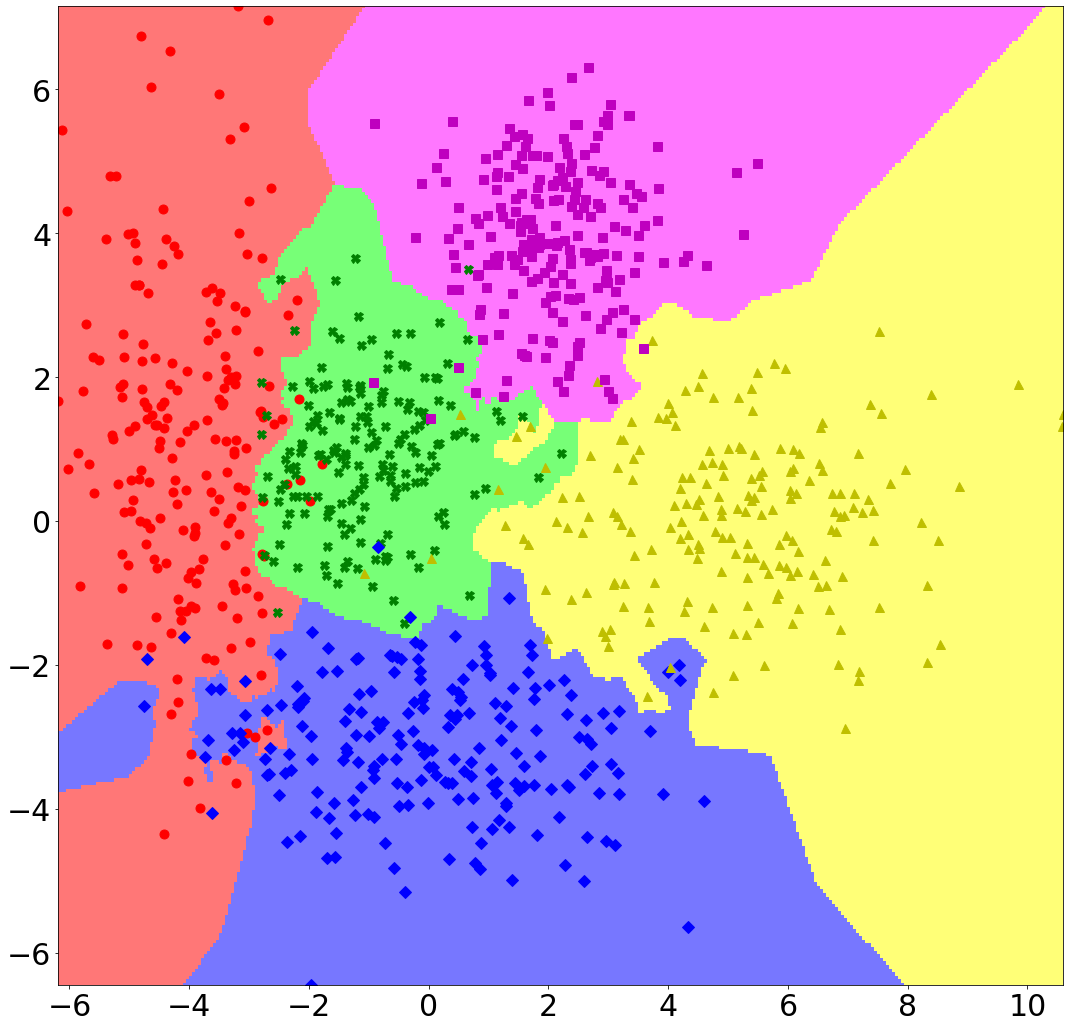

Radius Neighbor Classifier with r = 0.5
The Radius Neighbor Classifier Error = 0.048


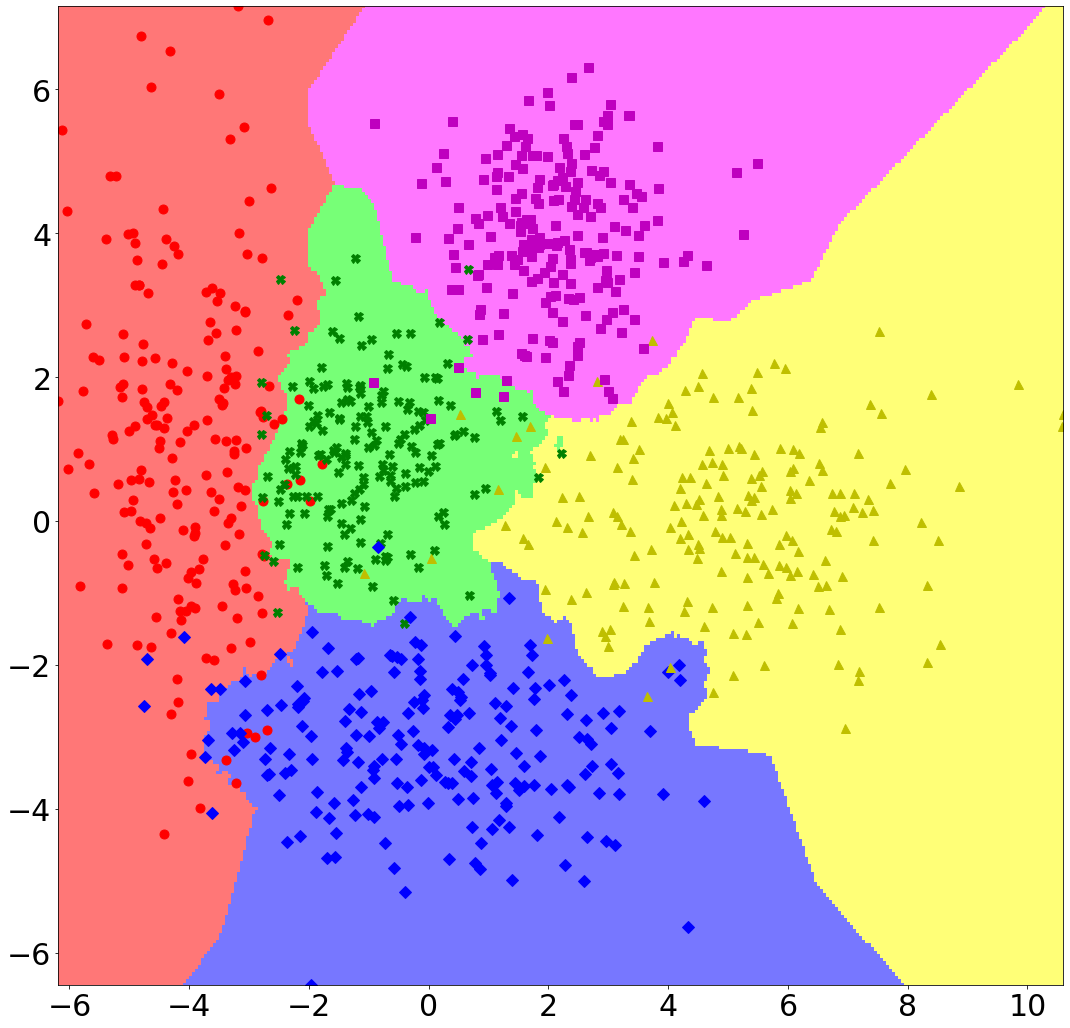

Radius Neighbor Classifier with r = 1
The Radius Neighbor Classifier Error = 0.05


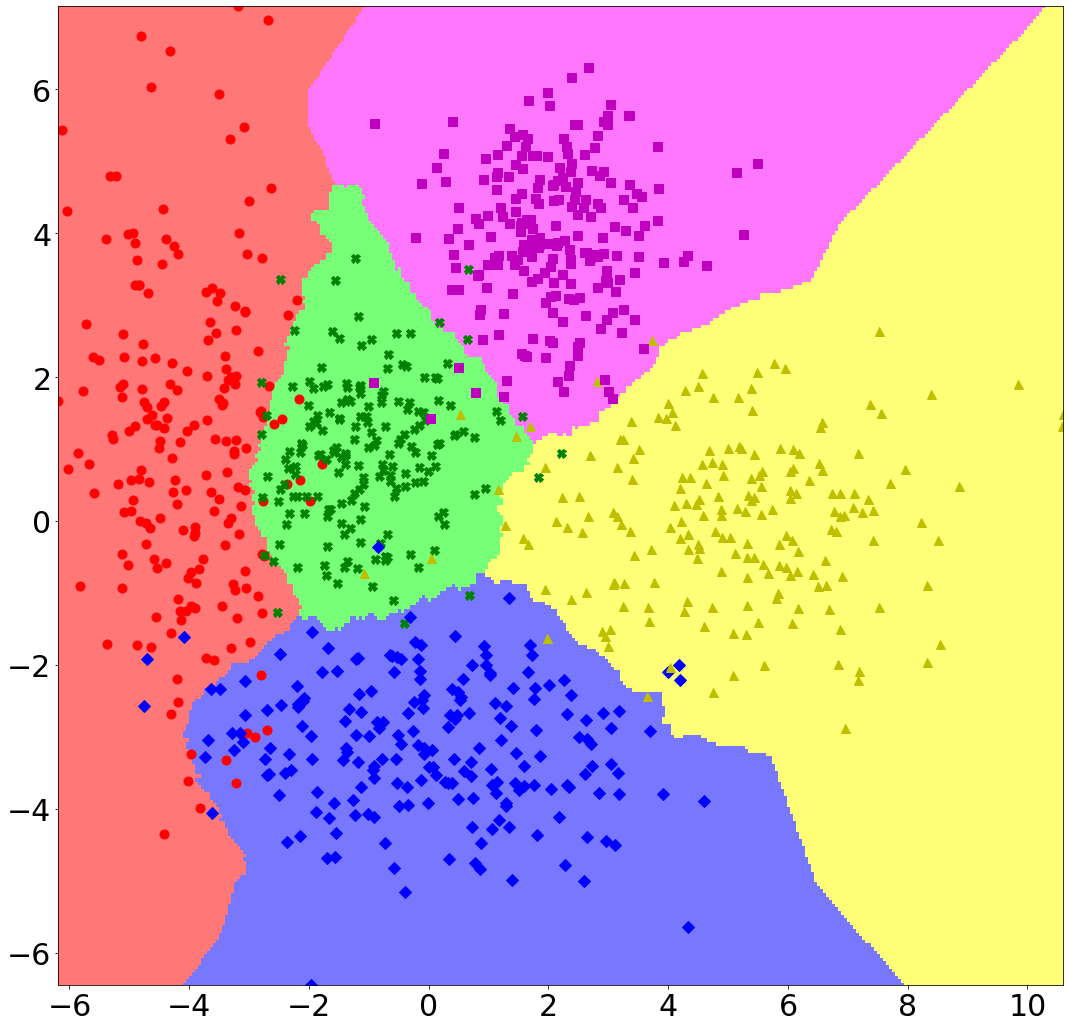

Radius Neighbor Classifier with r = 1.5
The Radius Neighbor Classifier Error = 0.056


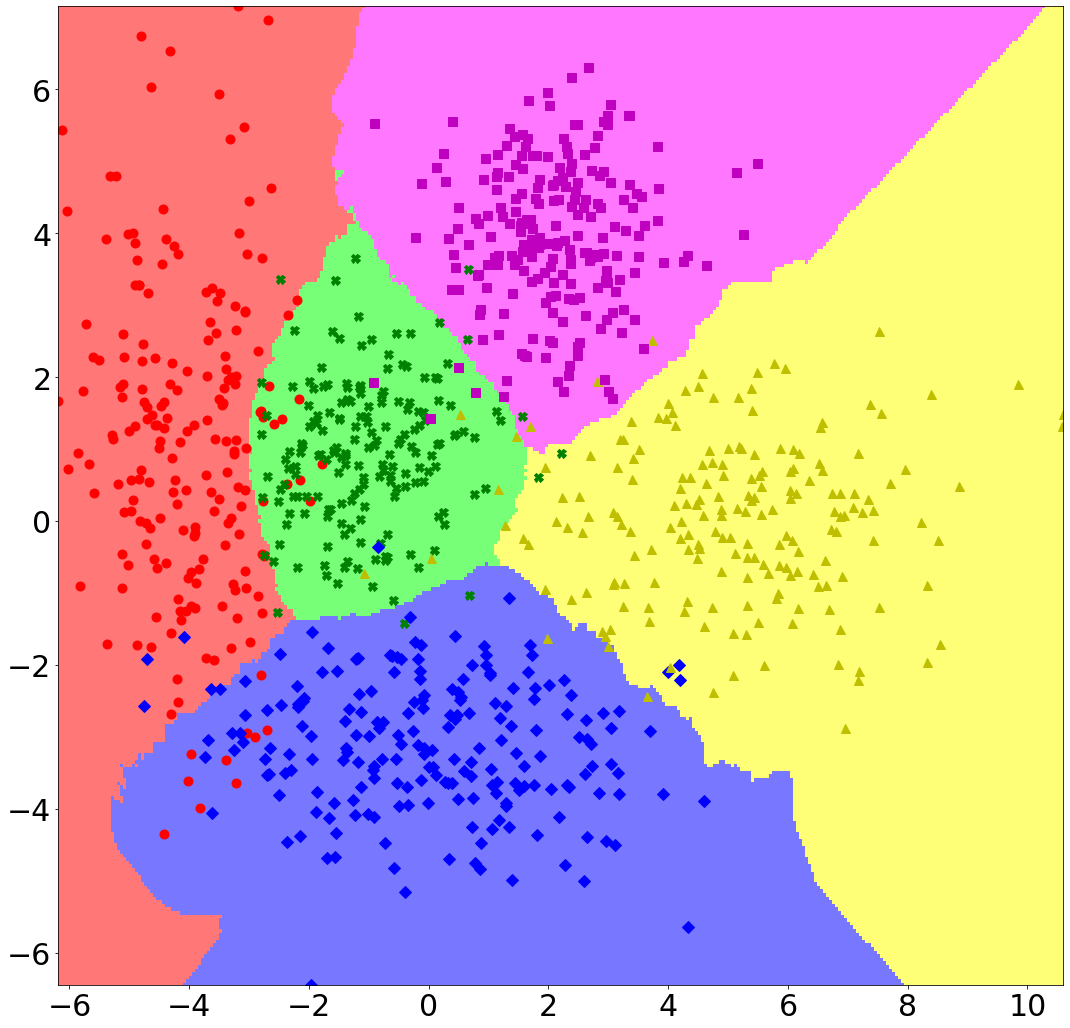

In [6]:
r=0.3
print("Radius Neighbor Classifier with r =",r)
RaN(ED,Plot_ED,x,y,xx0,xx1,h,r)
r=0.5
print("Radius Neighbor Classifier with r =",r)
RaN(ED,Plot_ED,x,y,xx0,xx1,h,r)
r=1
print("Radius Neighbor Classifier with r =",r)
RaN(ED,Plot_ED,x,y,xx0,xx1,h,r)
r=1.5
print("Radius Neighbor Classifier with r =",r)
RaN(ED,Plot_ED,x,y,xx0,xx1,h,r)